In [2]:
from google.cloud import bigquery
from google.cloud.bigquery import dbapi
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [3]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/Users/grolleau/Desktop/github repos/Cost variability/json_credentials/grolleau_application_default_credentials.json'
os.environ['GCLOUD_PROJECT'] = 'som-nero-phi-jonc101-secure'

# Instantiate a client object so you can make queries
client = bigquery.Client()

# Create a connexion to that client
conn = dbapi.connect(client);

In [4]:
query = "SELECT * FROM `som-nero-phi-jonc101-secure.proj_IP_variation.matched_drg_cost_adms`";
df = pd.read_sql_query(query, conn)

In [5]:
print('The cost dataset has:')
print(f"{df.shape[0]} rows")
print(f"{df.shape[1]} colums")

The cost dataset has:
108702 rows
22 colums


In [6]:
f'The cost dataset is {df.memory_usage(deep=True).sum() / 1024 / 1024:.2f} Mo'

'The cost dataset is 70.70 Mo'

In [7]:
df.head()

,anon_id,adm_date_jittered,disch_date_jittered,discharge_year,MSDRGWeight,CPI,Cost_Adj,observation_id_x,LOS,observation_id,...,drg_mpi_code,drg_id,drg_name,DRG_CODE_SET_C,drg_weight,match_step,Cost_Predicted,Cost_Residual,Cost_Residual_sq,Cost_Relative
0,JC2847684,2020-01-20,2020-01-21,2020,0.7385,518.876,1.789141,JC2847684_2020-01-20,1.0,131282280569,...,052,2351,ALTERATION IN CONSCIOUSNESS,3,0.7385,1,5.586767,-3.797626,14.421964,1.767342
1,JC2847684,2020-01-20,2020-01-21,2020,0.7385,518.876,1.789141,JC2847684_2020-01-20,1.0,131282280569,...,072,1637,NONSPECIFIC CEREBROVASCULAR DISORDERS WITHOUT ...,6,0.7385,1,5.586767,-3.797626,14.421964,1.767342
2,JC571693,2020-10-28,2020-10-30,2020,0.7385,518.876,5.859418,JC571693_2020-10-28,2.0,131298721167,...,199,2416,HYPERTENSION,3,0.7385,1,5.586767,0.272651,0.074339,5.788027
3,JC571693,2020-10-28,2020-10-30,2020,0.7385,518.876,5.859418,JC571693_2020-10-28,2.0,131298721167,...,305,1820,HYPERTENSION WITHOUT MCC,6,0.7385,1,5.586767,0.272651,0.074339,5.788027
4,JC3041511,2020-11-11,2020-11-14,2020,0.7385,518.876,5.886646,JC3041511_2020-11-11,3.0,131298811590,...,199,2416,HYPERTENSION,3,0.7385,1,5.586767,0.299879,0.089927,5.814923


In [8]:
# Check and confirm that some patients (anon_id) appear more that once:
# Admissions with multiple DRGs are duplicated
# Also, some patiens had multiple admissions
df[df['anon_id'] == df[df['anon_id'].duplicated()]['anon_id'].iloc[1]]

,anon_id,adm_date_jittered,disch_date_jittered,discharge_year,MSDRGWeight,CPI,Cost_Adj,observation_id_x,LOS,observation_id,...,drg_mpi_code,drg_id,drg_name,DRG_CODE_SET_C,drg_weight,match_step,Cost_Predicted,Cost_Residual,Cost_Residual_sq,Cost_Relative
2,JC571693,2020-10-28,2020-10-30,2020,0.7385,518.876,5.859418,JC571693_2020-10-28,2.0,131298721167,...,199,2416,HYPERTENSION,3,0.7385,1,5.586767,0.272651,0.074339,5.788027
3,JC571693,2020-10-28,2020-10-30,2020,0.7385,518.876,5.859418,JC571693_2020-10-28,2.0,131298721167,...,305,1820,HYPERTENSION WITHOUT MCC,6,0.7385,1,5.586767,0.272651,0.074339,5.788027
8692,JC571693,2020-03-07,2020-03-18,2020,4.4907,518.876,33.172234,JC571693_2020-03-07,11.0,131286808160,...,951,2639,MODERATELY EXTENSIVE O.R. PROCEDURE UNRELATED ...,3,4.4907,1,24.009732,9.162503,83.951453,32.768061
8693,JC571693,2020-03-07,2020-03-18,2020,4.4907,518.876,33.172234,JC571693_2020-03-07,11.0,131286808160,...,981,2316,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,6,4.4907,1,24.009732,9.162503,83.951453,32.768061
39417,JC571693,2020-05-19,2020-05-24,2020,2.6893,518.876,9.297923,JC571693_2020-05-19,5.0,131289625515,...,092,2365,FACIAL BONE PROCEDURES EXCEPT MAJOR CRANIAL OR...,3,2.6893,2,15.165020,-5.867097,34.422827,9.184636
39418,JC571693,2020-05-19,2020-05-24,2020,2.6893,518.876,9.297923,JC571693_2020-05-19,5.0,131289625515,...,131,1681,CRANIAL/FACIAL PROCEDURES W CC/MCC,6,2.6893,2,15.165020,-5.867097,34.422827,9.184636
50423,JC571693,2020-05-08,2020-05-09,2020,0.9881,518.876,6.119944,JC571693_2020-05-08,1.0,131289163706,...,241,2435,PEPTIC ULCER AND GASTRITIS,3,0.9881,2,6.812281,-0.692337,0.479330,6.045378
50424,JC571693,2020-05-08,2020-05-09,2020,0.9881,518.876,6.119944,JC571693_2020-05-08,1.0,131289163706,...,378,1875,GASTROINTESTINAL HEMORRHAGE WITH CC,6,0.9881,2,6.812281,-0.692337,0.479330,6.045378
69702,JC571693,2021-06-09,2021-06-10,2021,1.9130,525.276,1.890066,JC571693_2021-06-09,1.0,131313508325,...,044,2343,INTRACRANIAL HEMORRHAGE,3,1.9130,1,11.353456,-9.463390,89.555753,1.890066
69703,JC571693,2021-06-09,2021-06-10,2021,1.9130,525.276,1.890066,JC571693_2021-06-09,1.0,131313508325,...,064,1629,INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION...,6,1.9130,1,11.353456,-9.463390,89.555753,1.890066


In [9]:
# check if all df.MSDRGWeight == df.drg_weight
all(df['MSDRGWeight'] == df['drg_weight'])

True

In [10]:
# check which drg_id are the most common
df['drg_id'].value_counts().sort_values(ascending=False).head(10)

2592    2746
2251    2034
1946    1490
2334    1443
2412    1188
2259    1125
6427    1125
2462     947
2384     893
1806     800
Name: drg_id, dtype: int64

In [11]:
# chek if each values of drg_id has an unique value of drg_name
temp_res = df.groupby('drg_id')['drg_name'].nunique().sort_values(ascending=False)
temp_res

drg_id
1581    1
2418    1
2309    1
2310    1
2312    1
       ..
1940    1
1941    1
1942    1
1943    1
8877    1
Name: drg_name, Length: 1027, dtype: int64

In [12]:
# to be sure, check if all these are ones
(temp_res == 1).all()

True

In [13]:
# get drg_name for each drg_id
drg_pd_df = df.groupby('drg_id').apply(lambda x: x[['drg_id', 'drg_name']].iloc[0])

# set drg_id as index
drg_pd_df = drg_pd_df.set_index('drg_id')
drg_pd_df.head()

,drg_name
drg_id,
1581,HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...
1582,HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...
1583,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...
1584,TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DI...
1585,LIVER TRANSPLANT WITH MCC OR INTESTINAL TRANSP...


In [14]:
# make drg_pd_dic a dictionary
drg_dic = drg_pd_df.to_dict()['drg_name']

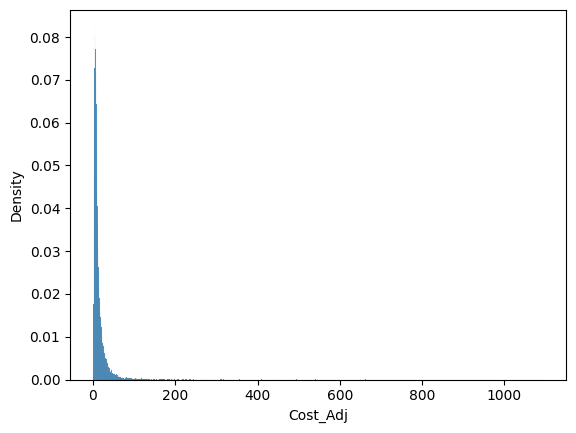

In [15]:
sns.histplot(df['Cost_Adj'], kde=False, stat='density');

In [16]:
print(f'Skewness is {df["Cost_Adj"].skew():.2f}')
print(f'Kurtosis is {df["Cost_Adj"].kurt():.2f}')

Skewness is 11.70
Kurtosis is 282.66


Not surprinsingly, because cost data cannot be negative, its empirical distribution is very positively (ie rigth) skewed. 

In [17]:
# Add ln_cost_adj column to the dataframe
df['ln_cost_adj'] = np.log(df['Cost_Adj'])

/opt/anaconda3/envs/healthrex_ml_2/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


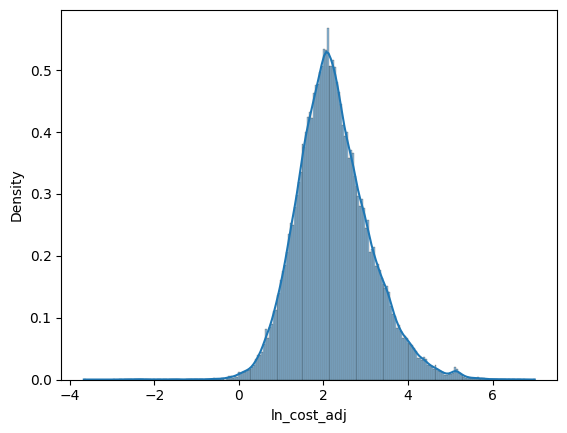

In [18]:
# Plot the histogram with seaborn using a kernel density estimate and put density as y axis
sns.histplot(df['ln_cost_adj'], kde=True, stat='density');

In [19]:
print(f'Skewness is {df["ln_cost_adj"].skew():.2f}')
print(f'Kurtosis is {df["ln_cost_adj"].kurt():.2f}')

Skewness is 0.40
Kurtosis is 1.07


Taking the log of cost cost, cost appears approximately log-normally distributed.

In [20]:
# ln_cost_adj descriptive statistics
def dec_stat(df, col_name = 'ln_cost_adj'):
    return pd.concat([df[col_name].describe(), pd.Series({'skew': df[col_name].skew(), 'kurtosis': df[col_name].kurtosis()})])

dec_stat(df, 'ln_cost_adj')

count       108698.000000
mean             2.239941
std              0.875374
min             -3.671179
25%              1.659070
50%              2.167743
75%              2.751496
max              6.998650
skew             0.402127
kurtosis         1.072817
dtype: float64

In [21]:
# get descriptive statistics for the column ln_cost_adj grouped by drg_id
drg_df = df.groupby('drg_id').apply(dec_stat)

# add drg_dict to drg_df
drg_df['drg_name'] = drg_df.index.map(drg_dic)

# sort by std
drg_df = drg_df.sort_values('std', ascending=False)

drg_df.head()

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis,drg_name
drg_id,,,,,,,,,,,
2310,6.0,3.643984,1.356105,1.982517,2.601168,3.815582,4.309342,5.579933,0.049161,-0.876524,HIV WITH EXTENSIVE O.R. PROCEDURES WITH MCC
2635,44.0,3.346890,1.240421,-2.370407,2.829901,3.378412,3.886143,6.061469,-1.992611,9.912016,EXTENSIVE ABDOMINAL OR THORACIC PROCEDURES FOR...
5394,100.0,4.208690,1.225066,1.044909,2.887922,5.088214,5.138129,5.463309,-0.644228,-1.284810,CHIMERIC ANTIGEN RECEPTOR (CAR) T-CELL AND OTH...
6192,4.0,2.408889,1.223366,1.459592,1.549026,2.033008,2.892871,4.109945,1.272688,0.875328,ANOXIC AND OTHER SEVERE BRAIN DAMAGE
1979,2.0,2.743709,1.221290,1.880127,2.311918,2.743709,3.175500,3.607292,NaN,NaN,FOOT PROCEDURES WITH MCC


In [22]:
# Assign the mean from drg_df to each drg
drg_mean_cost_dic = drg_df['mean'].to_dict()
df['drg_mean_cost'] = df['drg_id'].map(drg_mean_cost_dic)

# Assign the std from drg_df to each drg
drg_std_cost_dic = drg_df['std'].to_dict()
df['drg_std_cost'] = df['drg_id'].map(drg_std_cost_dic)

# Normalize all ln_cost_adj values given their drg_id
#df['ln_cost_adj_norm'] = df.groupby('drg_id')['ln_cost_adj'].transform(lambda x: (x - x.mean()) / x.std())

In [23]:
# Put drg_name as the first column of drg_df
drg_df.insert(0, 'drg_name', drg_df.pop('drg_name'))

#cutt-off count for the top_n drgs
top_n = 200
cutoff = drg_df['count'].sort_values(ascending=False).iloc[top_n]

drg_df_lim = drg_df[drg_df['count'] > cutoff]
drg_df_lim.sort_values('count', ascending=False).head(10)

,drg_name,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
drg_id,,,,,,,,,,,
2592,SEPTICEMIA AND DISSEMINATED INFECTIONS,2746.0,2.166583,0.878746,-2.953739,1.544323,2.074950,2.698610,5.330820,0.298920,1.192435
2251,SEPTICEMIA OR SEVERE SEPSIS WITHOUT MV >96 HOU...,2034.0,2.169765,0.778658,-2.953739,1.644384,2.133060,2.670817,4.801599,-0.068735,1.868104
1946,MAJOR HIP AND KNEE JOINT REPLACEMENT OR REATTA...,1490.0,2.156277,0.339932,-1.215381,2.009542,2.115920,2.270793,4.440818,-1.701662,30.103176
2334,OPEN CRANIOTOMY EXCEPT TRAUMA,1443.0,2.695743,0.596200,-0.183153,2.290596,2.548233,3.016648,5.113523,0.864842,1.282590
2412,HEART FAILURE,1188.0,2.022051,0.640482,-2.578046,1.628703,1.941997,2.348081,4.843896,0.359096,4.452304
6427,OTHER CHEMOTHERAPY,1125.0,1.736822,0.624196,-0.186666,1.419944,1.760612,2.056291,5.158050,0.363189,2.408495
2259,PSYCHOSES,1125.0,2.112037,0.903625,-0.587628,1.539828,2.087727,2.668013,5.744651,0.142377,0.200144
2462,DORSAL AND LUMBAR FUSION PROCEDURE EXCEPT FOR ...,947.0,3.024094,0.505340,-0.368686,2.705108,2.978676,3.325694,4.857334,-0.315223,4.382238
2384,MAJOR RESPIRATORY INFECTIONS AND INFLAMMATIONS,893.0,2.039842,0.817292,-0.165006,1.487668,1.964171,2.510670,6.017413,0.639980,1.099460


In [24]:
# Get the mean cost across DRGs and the mean std across DRGs
mean_mean, mean_std = drg_df['mean'].mean(), drg_df['std'].mean()

/opt/anaconda3/envs/healthrex_ml_2/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


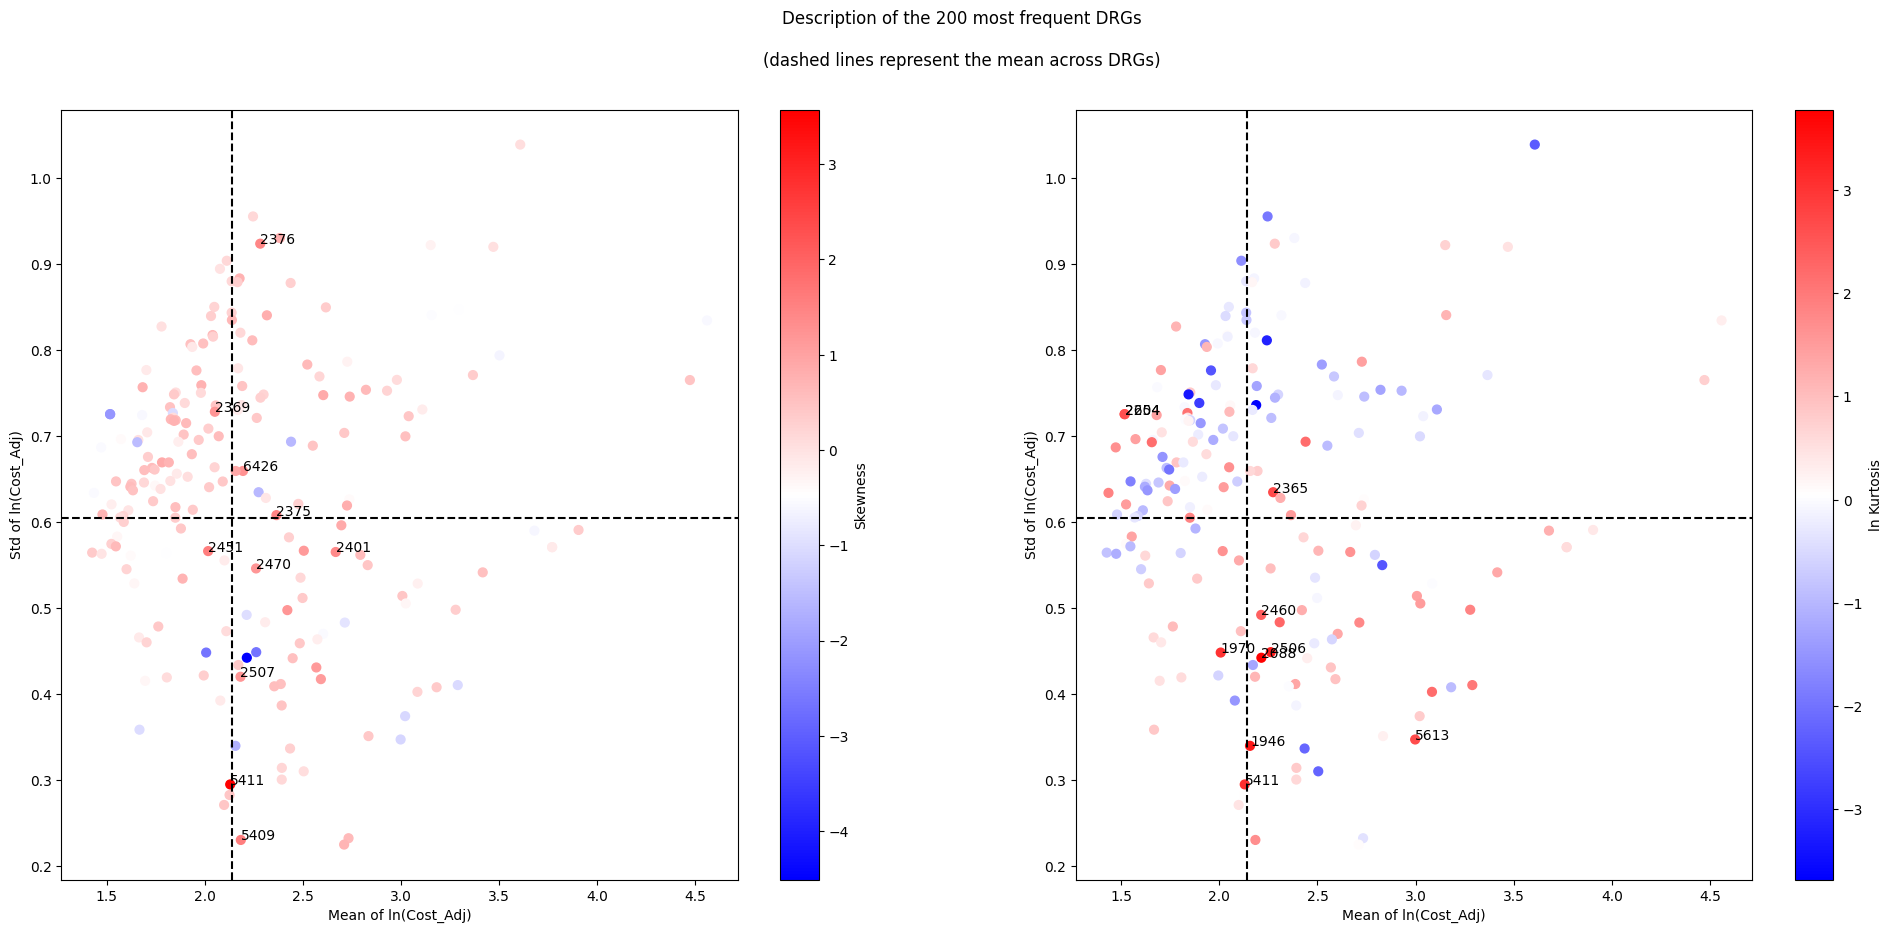

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(24, 10))  # 1 row, 2 columns

# create a colormap from blue to white to red
cmap = mcolors.LinearSegmentedColormap.from_list("", ['blue', 'white', 'red'])

## Plot 1
# plot std vs mean and color the dots by counts
scatter = axs[0].scatter(drg_df_lim['mean'], drg_df_lim['std'], c= drg_df_lim['skew'], cmap=cmap, s=40, alpha=1)

# sort DataFrame by 'skew' and select top 10
top_skew = drg_df_lim.sort_values('skew', ascending=False).head(10)

# add text identifiers for top 10 skew
for i in top_skew.index:
    axs[0].text(top_skew['mean'].loc[i], top_skew['std'].loc[i], i)

# add legend for the color
fig.colorbar(scatter, ax=axs[0], label='Skewness')

# add vertical line for the mean of the mean cost across DRGs
axs[0].axvline(x=mean_mean, color='black', linestyle='--')

# add horizontal line for the mean of the mean std across DRGs
axs[0].axhline(y=mean_std, color='black', linestyle='--')

# add labels
axs[0].set_xlabel('Mean of ln(Cost_Adj)')
axs[0].set_ylabel('Std of ln(Cost_Adj)')

## Plot 2
# plot std vs mean and color the dots by counts
scatter = axs[1].scatter(drg_df_lim['mean'], drg_df_lim['std'], c=np.log(drg_df_lim['kurtosis']), cmap=cmap, s=40, alpha=1)

# sort DataFrame by 'kurtosis' and select top 10
top_kurtosis = drg_df_lim.sort_values('kurtosis', ascending=False).head(10)

# add text identifiers for top 10 kurtosis
for i in top_kurtosis.index:
    axs[1].text(top_kurtosis['mean'].loc[i], top_kurtosis['std'].loc[i], i)

# add legend for the color
fig.colorbar(scatter, ax=axs[1], label='ln Kurtosis')

# add vertical line for the mean of the mean cost across DRGs
axs[1].axvline(x=mean_mean, color='black', linestyle='--')

# add horizontal line for the mean of the mean std across DRGs
axs[1].axhline(y=mean_std, color='black', linestyle='--')

# add labels
axs[1].set_xlabel('Mean of ln(Cost_Adj)')
axs[1].set_ylabel('Std of ln(Cost_Adj)')


## Finish the plot
# add main title
fig.suptitle(f'Description of the {top_n} most frequent DRGs\n\n(dashed lines represent the mean across DRGs)')
plt.show()

In [26]:
def list_of_lists(n_lists, list_len):
    return [[i for i in range(list_len*j,list_len*j+list_len)] for j in range(n_lists)]

n_plots = 3
list_of_lists(n_plots, 10)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]]

In [27]:
# We'll plot the 1-10 most frequent DRG, then the 11-20 most frequent DRG, and so on
positions = list_of_lists(5, 10)

In [28]:
# Add drg_count for each drg in df
drg_count_dic = drg_df['count'].to_dict()

# Add drg_count to df
df['drg_count'] = df['drg_id'].map(drg_count_dic)

# limit to the top_n most frequent drg_id
df_lim = df[df['drg_count'] > cutoff]
df_lim['drg_count'] = df_lim['drg_id'].map(drg_count_dic)

# Add a new colum that is drg_id (n=drg_count)
df_lim['drg_id_count'] = df_lim['drg_id'] + ' (n=' + df_lim['drg_count'].astype(int).astype(str) + ')'

/var/folders/g9/0793jttd561450xdx_49841c0000gq/T/ipykernel_22030/2584499856.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lim['drg_count'] = df_lim['drg_id'].map(drg_count_dic)
/var/folders/g9/0793jttd561450xdx_49841c0000gq/T/ipykernel_22030/2584499856.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lim['drg_id_count'] = df_lim['drg_id'] + ' (n=' + df_lim['drg_count'].astype(int).astype(str) + ')'


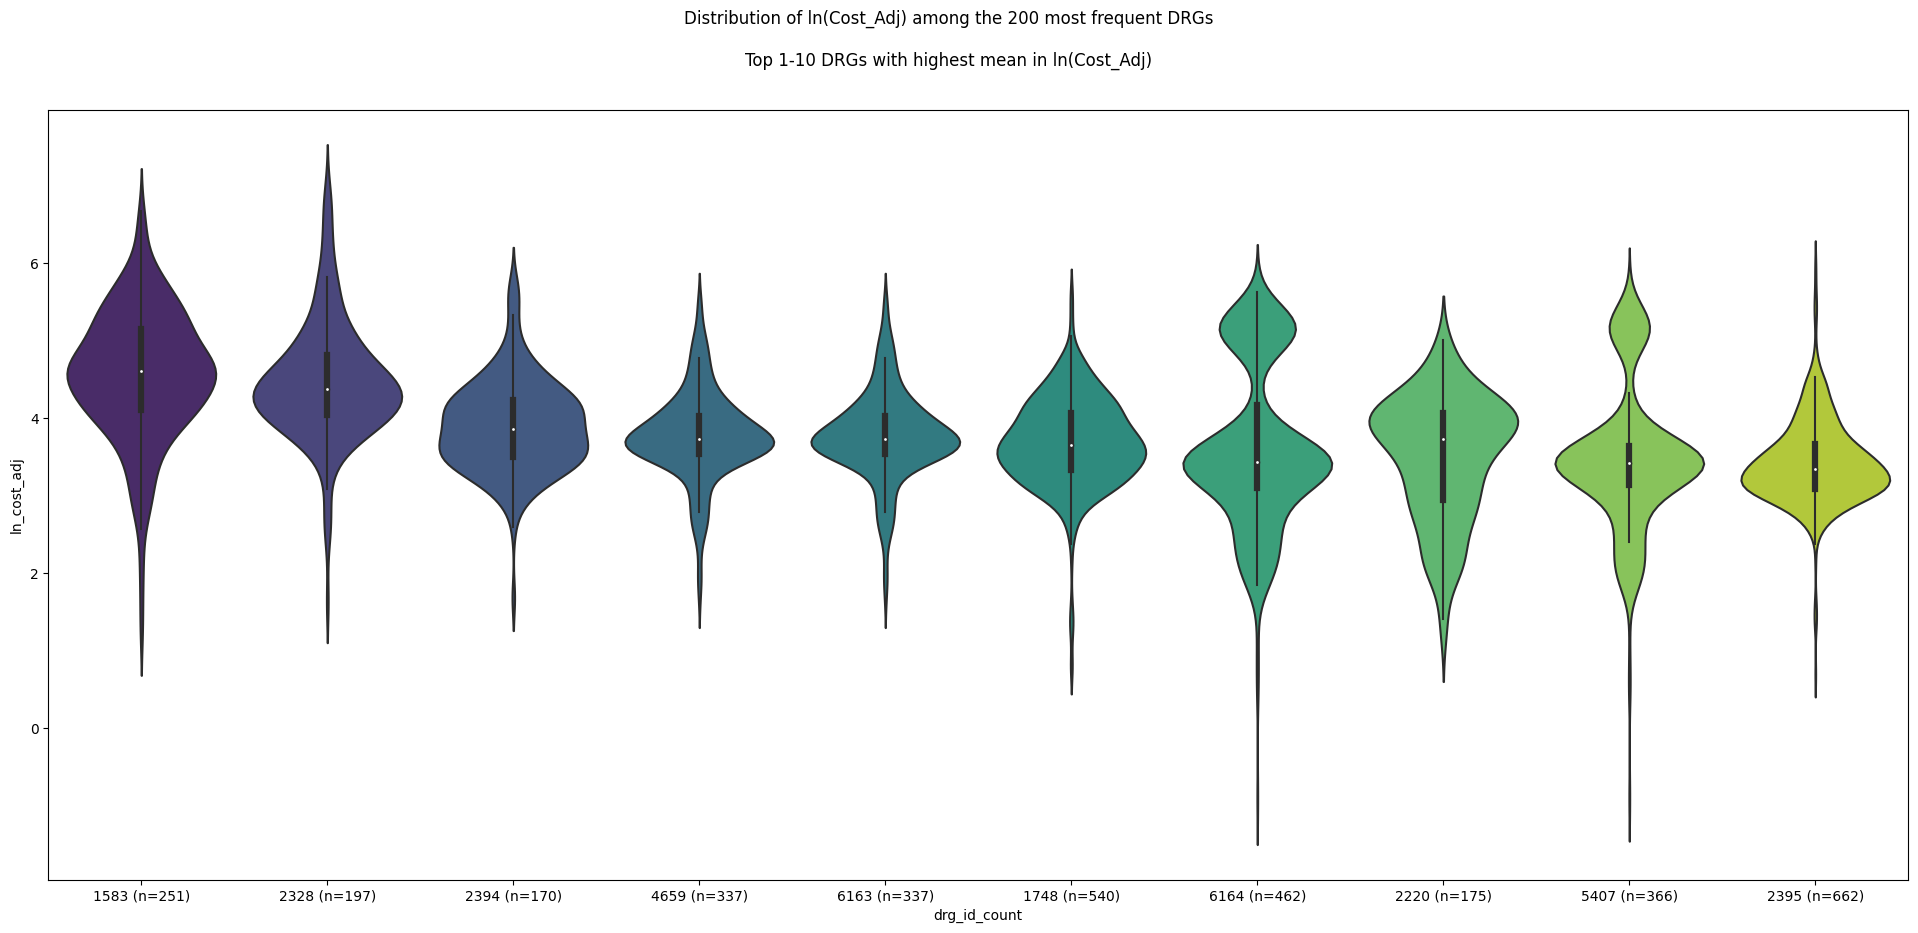

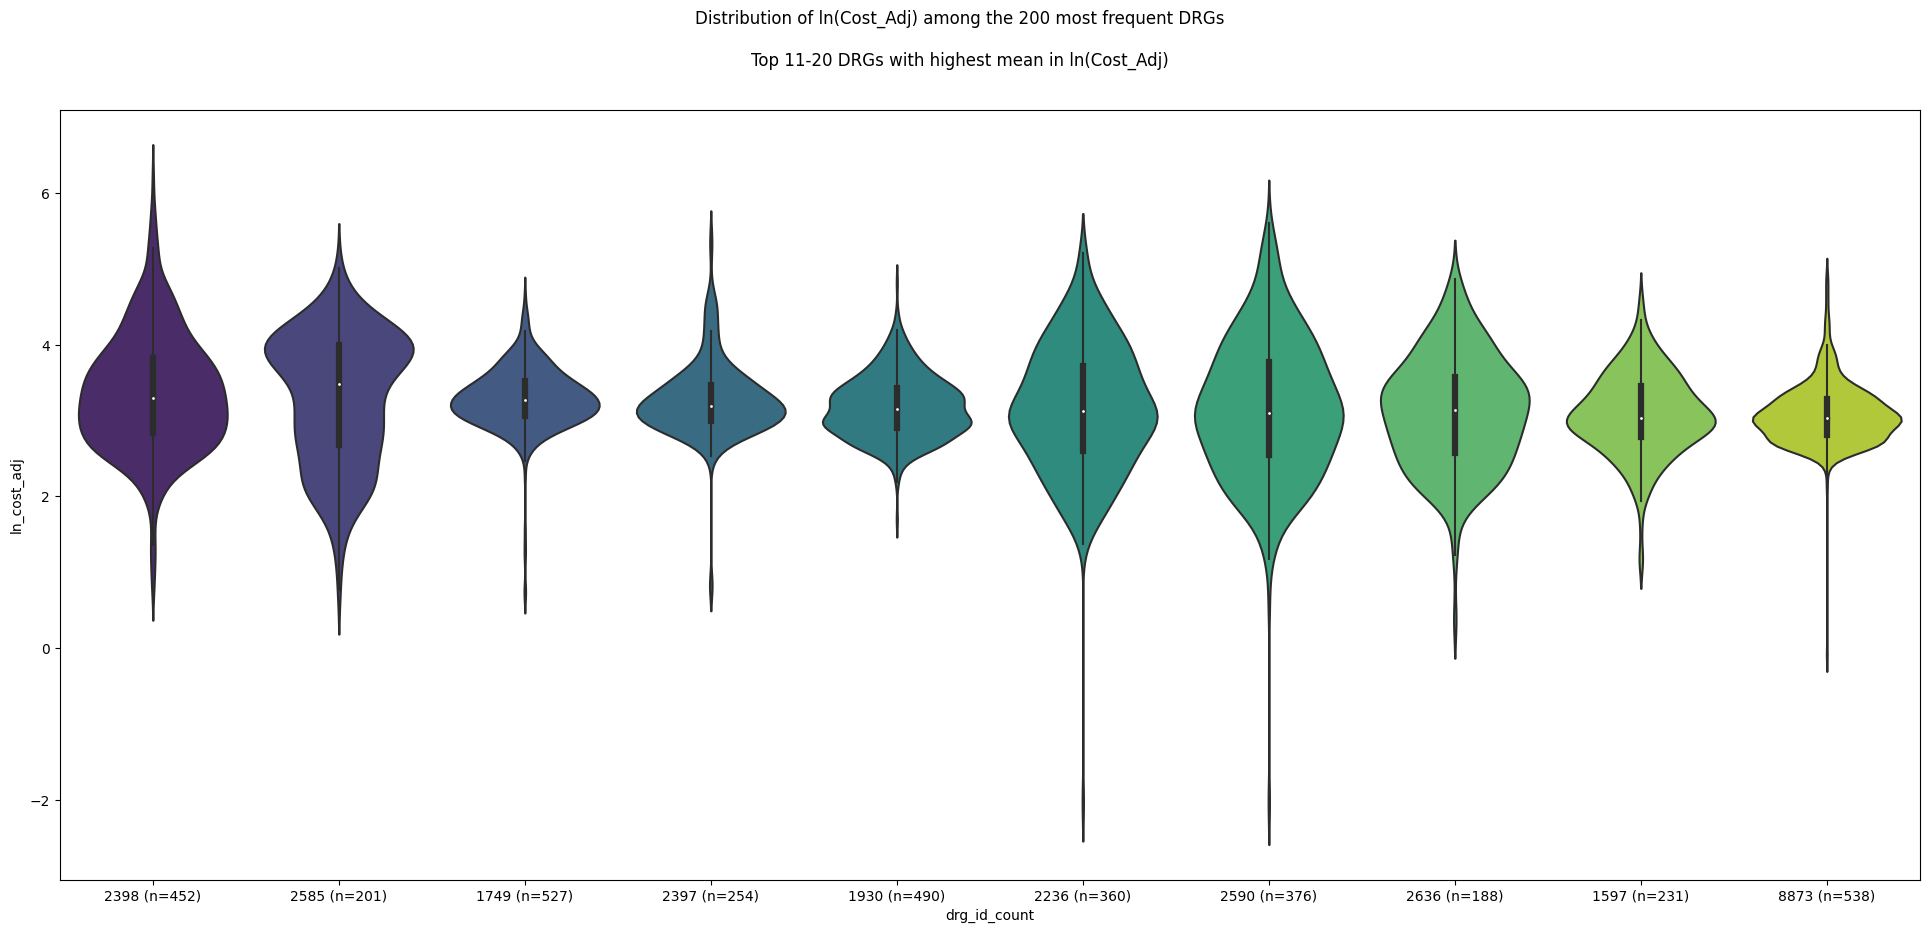

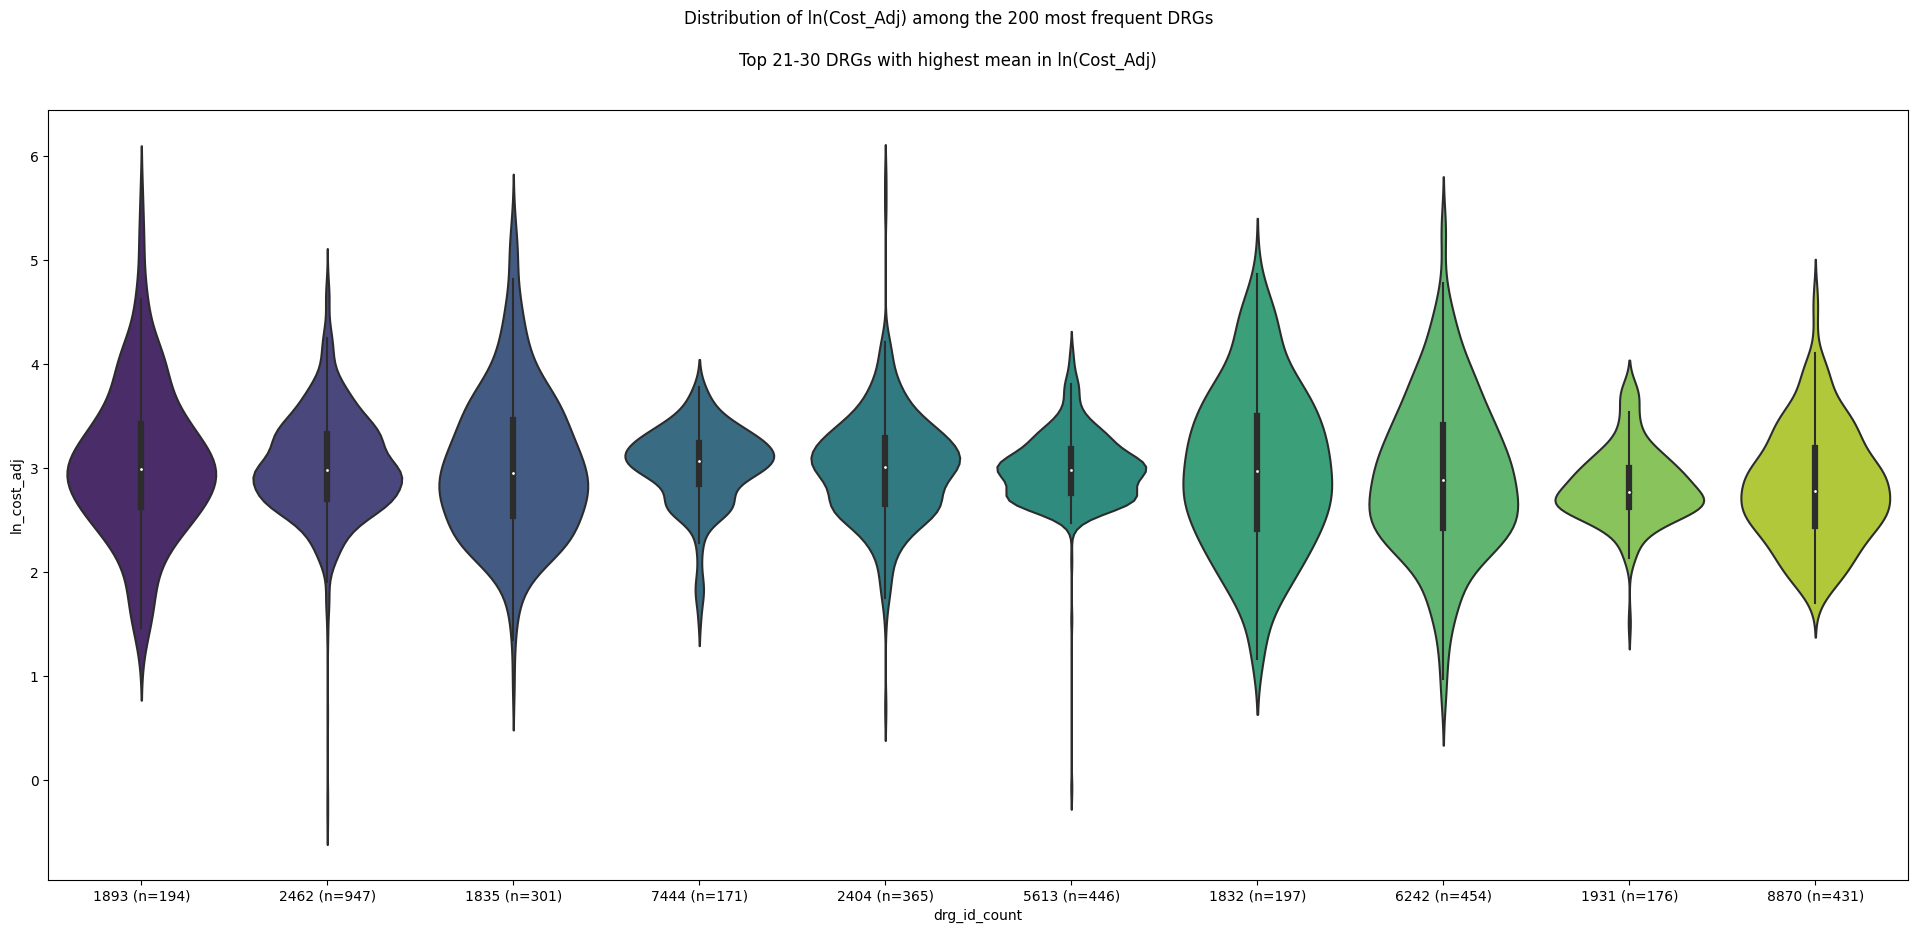

In [29]:
for i in range(n_plots):
    top_n_drgid = drg_df[drg_df['count'] > cutoff]['mean'].sort_values(ascending=False).iloc[positions[i]].index
    df_top_n_drgid = df_lim[list(map(top_n_drgid.__contains__, df_lim['drg_id']))]

    # Get order by mean of 'ln_cost_adj' for each 'drg_id'
    order = df_top_n_drgid.groupby('drg_id_count')['ln_cost_adj'].mean().sort_values(ascending=False).index

    plt.figure(figsize=(24, 10))
    sns.violinplot(x='drg_id_count', y='ln_cost_adj', data=df_top_n_drgid, scale='width', palette='viridis', order=order)

    # add title
    plt.suptitle(f'Distribution of ln(Cost_Adj) among the {top_n} most frequent DRGs\n\nTop {positions[i][0]+1}-{positions[i][-1]+1} DRGs with highest mean in ln(Cost_Adj)')

    plt.show()


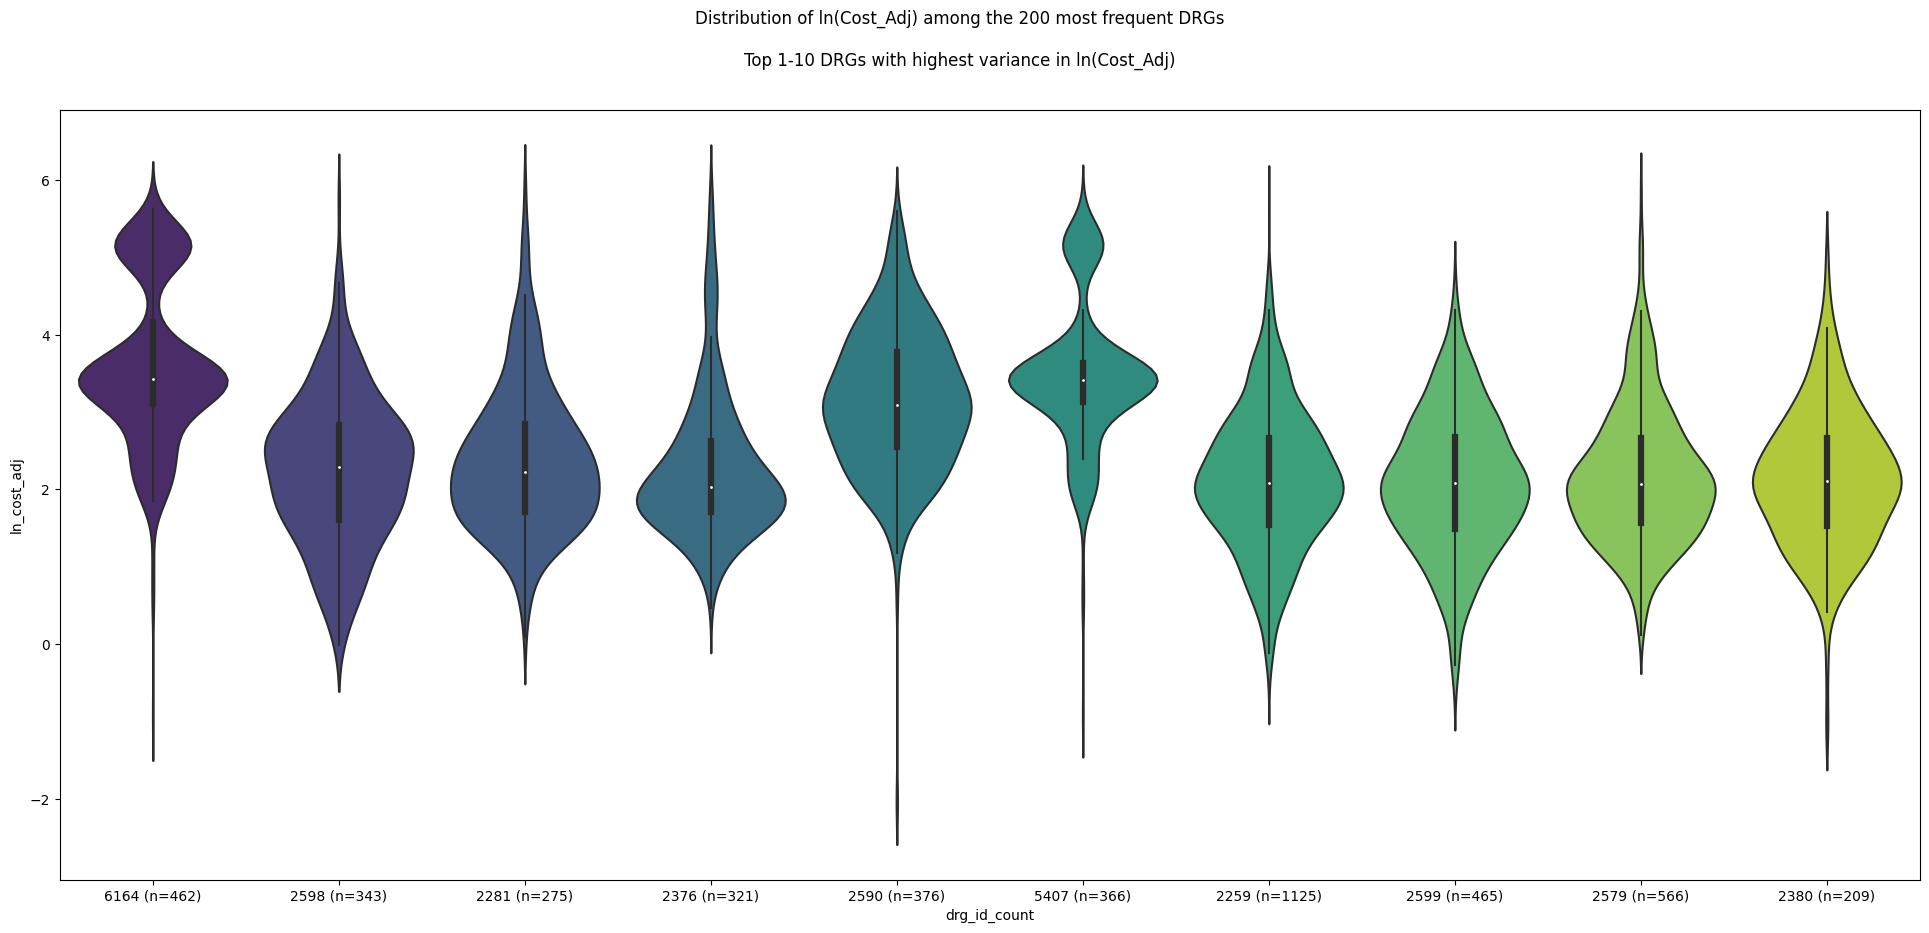

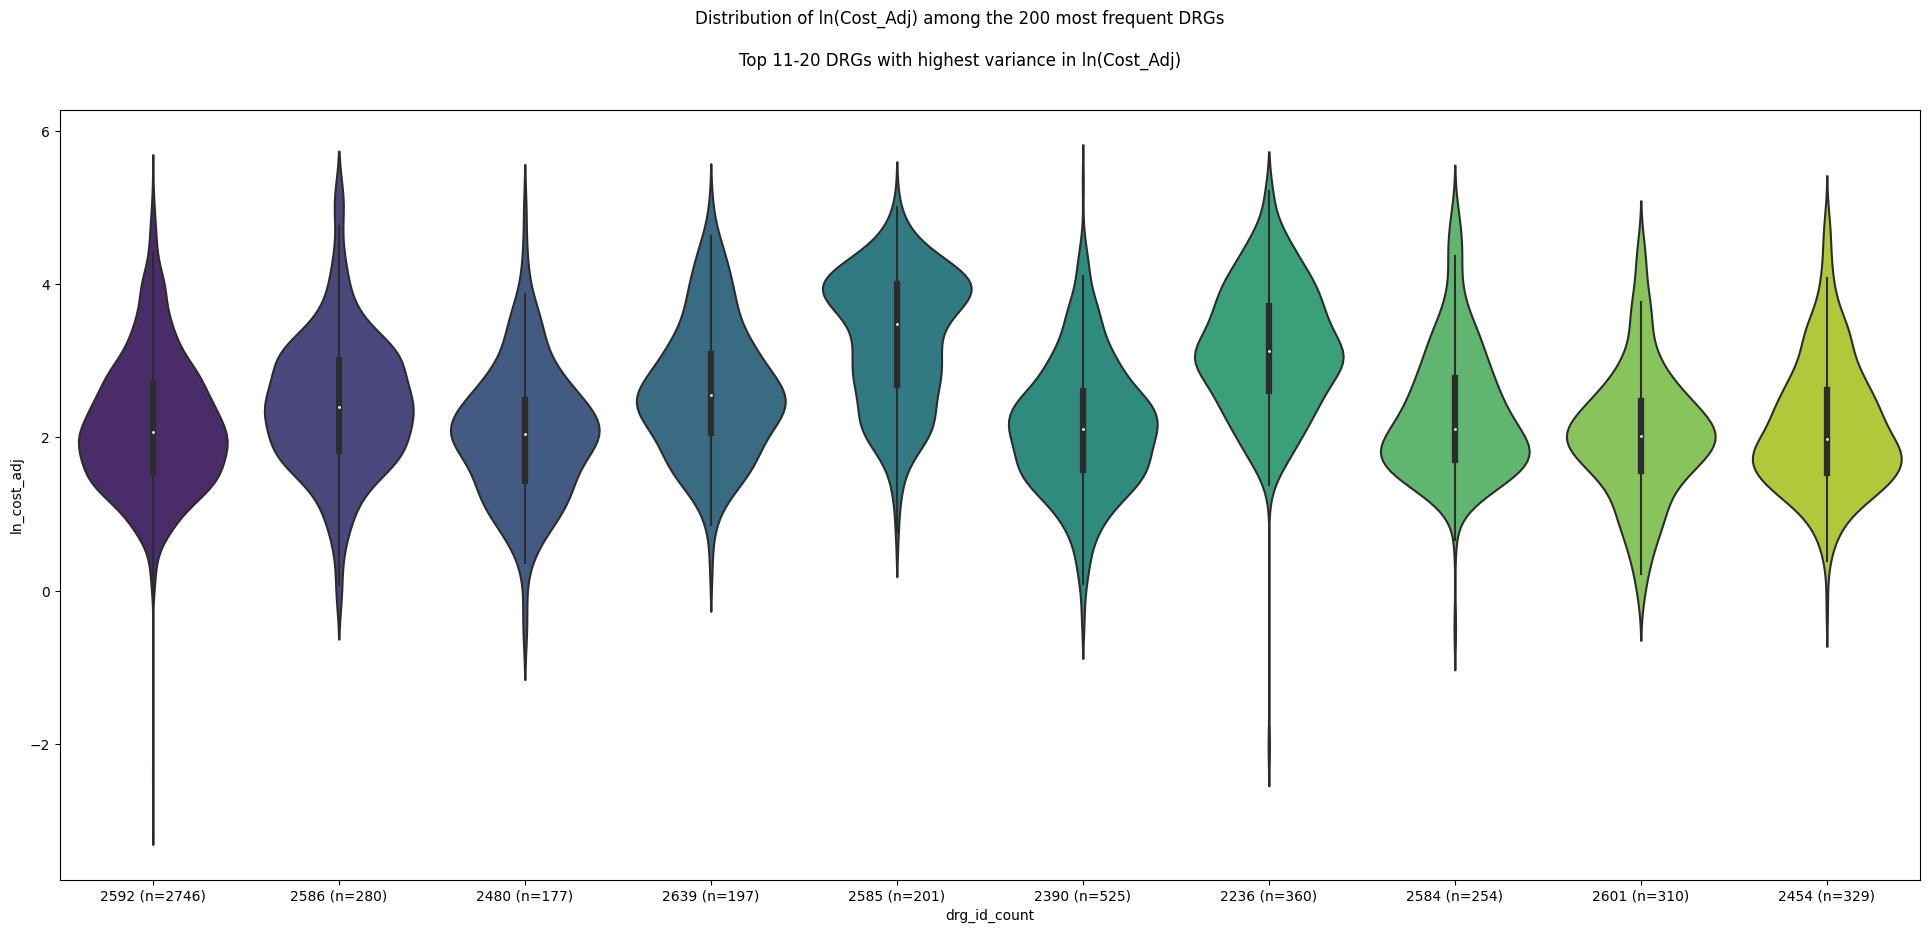

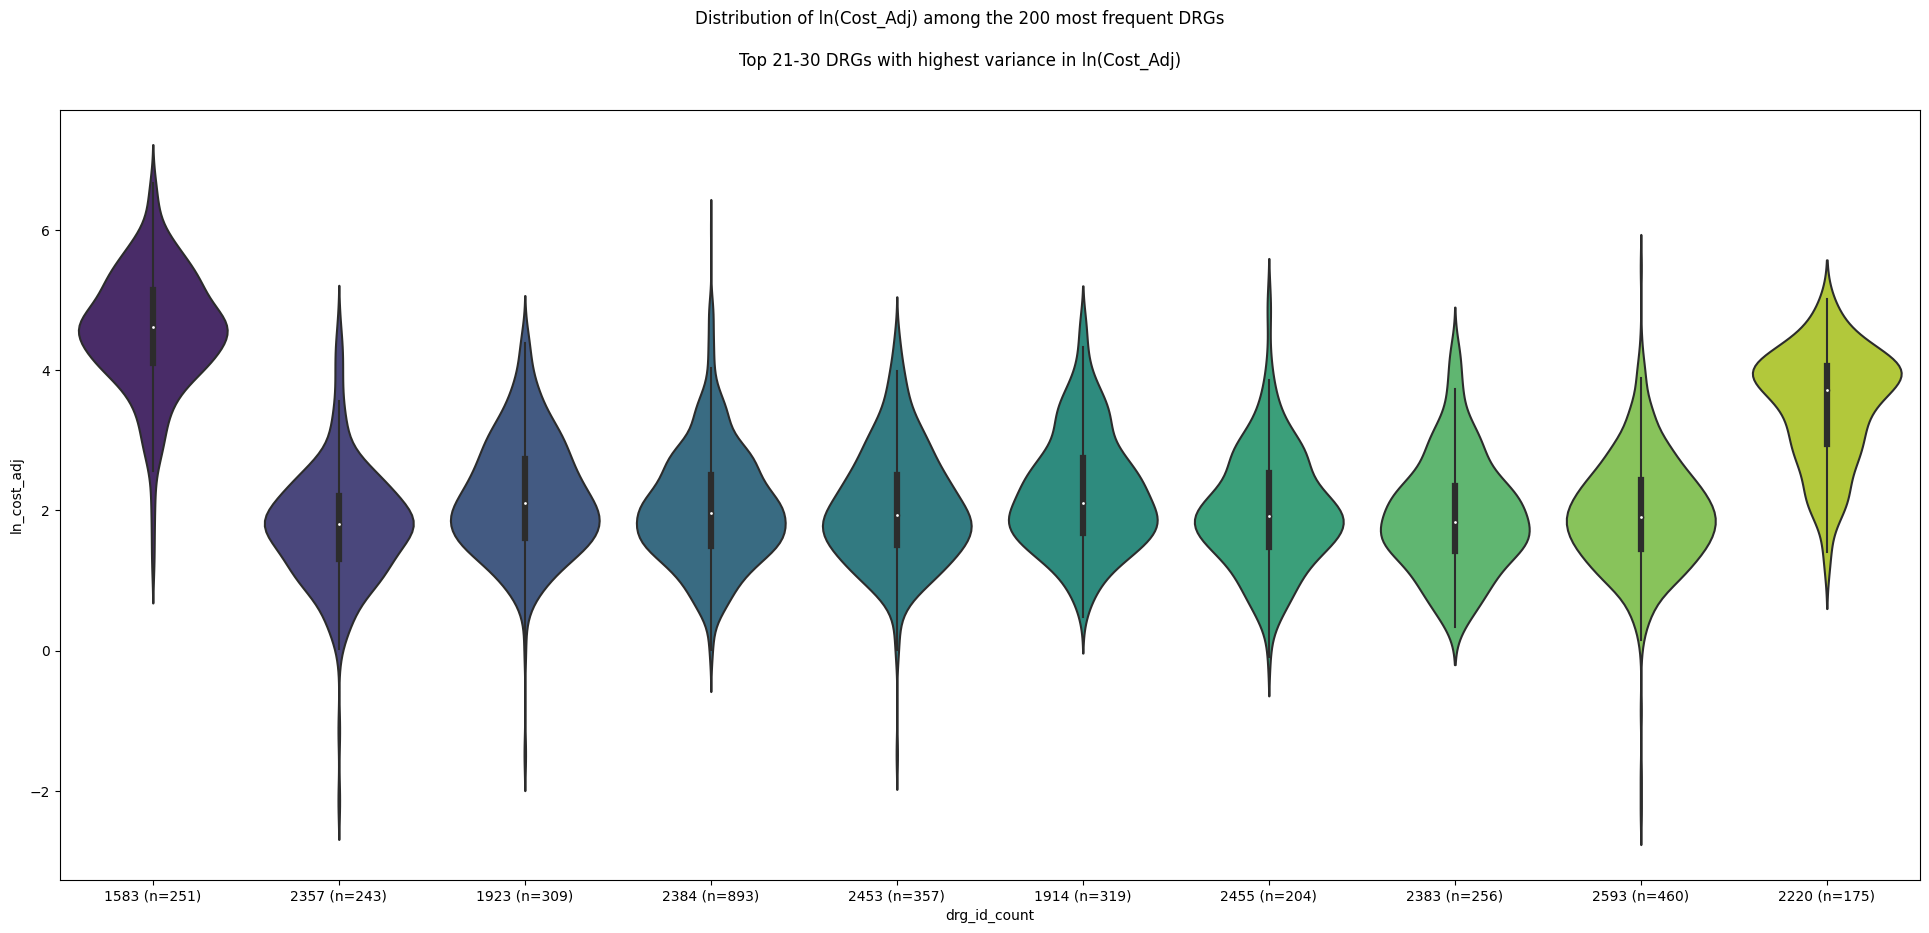

In [30]:
for i in range(n_plots):
    top_n_drgid = drg_df[drg_df['count'] > cutoff]['std'].sort_values(ascending=False).iloc[positions[i]].index
    df_top_n_drgid = df_lim[list(map(top_n_drgid.__contains__, df_lim['drg_id']))]

    # Get order by std of 'ln_cost_adj' for each 'drg_id'
    order = df_top_n_drgid.groupby('drg_id_count')['ln_cost_adj'].std().sort_values(ascending=False).index

    plt.figure(figsize=(24, 10))
    sns.violinplot(x='drg_id_count', y='ln_cost_adj', data=df_top_n_drgid, scale='width', palette='viridis', order=order)

    # add title
    plt.suptitle(f'Distribution of ln(Cost_Adj) among the {top_n} most frequent DRGs\n\nTop {positions[i][0]+1}-{positions[i][-1]+1} DRGs with highest variance in ln(Cost_Adj)')

    plt.show()

In [31]:
drg_df.loc['5407']

drg_name    AUTOLOGOUS BONE MARROW TRANSPLANT WITH CC/MCC
count                                               366.0
mean                                             3.470059
std                                              0.919762
min                                             -0.896543
25%                                              3.136504
50%                                              3.414026
75%                                              3.638799
max                                              5.631662
skew                                             0.035639
kurtosis                                         1.592022
Name: 5407, dtype: object

In [32]:
#sort drg_df by counts
drg_df.sort_values('mean', ascending=False)

,drg_name,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
drg_id,,,,,,,,,,,
2393,IMPLANTABLE HEART ASSIST SYSTEMS,28.0,5.097730,0.959739,3.188556,4.779170,5.073565,5.714632,6.666894,-0.483436,-0.034154
6165,EXTRACORPOREAL MEMBRANE OXYGENATION (ECMO),12.0,4.800976,0.710089,3.949679,4.348450,4.638787,5.189482,6.496020,1.239669,1.795999
1581,HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SY...,136.0,4.697898,0.824571,2.418274,4.201967,4.551280,5.091764,6.998650,0.463613,0.761974
1583,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,251.0,4.558866,0.834276,1.232029,4.100056,4.612849,5.144372,6.668015,-0.571287,1.330413
2328,HEART AND/OR LUNG TRANSPLANT,197.0,4.471457,0.764986,1.632452,4.038275,4.376022,4.813554,6.998650,0.471272,2.100658
...,...,...,...,...,...,...,...,...,...,...,...
2122,URETHRAL STRICTURE,1.0,0.772749,NaN,0.772749,0.772749,0.772749,0.772749,0.772749,NaN,NaN
2270,SKIN GRAFTS FOR INJURIES WITHOUT CC/MCC,1.0,0.755531,NaN,0.755531,0.755531,0.755531,0.755531,0.755531,NaN,NaN
2146,OTHER MALE REPRODUCTIVE SYSTEM DIAGNOSES WITHO...,1.0,0.670617,NaN,0.670617,0.670617,0.670617,0.670617,0.670617,NaN,NaN


In [33]:
def rank_drg(drg_id):
    l = drg_df.sort_values('mean', ascending=False).index.astype(int).tolist()
    rank_by_mean = np.where(np.array(l) == drg_id)[0][0] + 1

    l = drg_df.sort_values('std', ascending=False).index.astype(int).tolist()
    rank_by_std = np.where(np.array(l) == drg_id)[0][0] + 1

    print(f'drg_id {drg_id} is {drg_dic[str(drg_id)]}') 
    print(f'it\'s the no. {rank_by_mean} most costly, and the no. {rank_by_std} highest variance')

rank_drg(1583)

drg_id 1583 is ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRINCIPAL DIAGNOSIS EXCEPT FACE, MOUTH AND NECK WITH MAJOR O.R. PROCEDURES
it's the no. 4 most costly, and the no. 103 highest variance


In [34]:
rank_drg(2281)

drg_id 2281 is COMPLICATIONS OF TREATMENT WITH MCC
it's the no. 304 most costly, and the no. 44 highest variance
